<a href="https://colab.research.google.com/github/Coderx44/Hello-world/blob/master/DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DL_LAB/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=df.iloc[:,0:8]
y=df['Outcome']

In [ ]:
obj=StandardScaler()
x_=obj.fit_transform(x)


In [ ]:
x_.shape

(768, 8)

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x_,y,test_size=0.1)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(10,  activation='relu'))  # input layer requires input_dim param
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["accuracy"],
)

In [ ]:
model_1=model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest), epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 7ms/step - loss: 0.6884 - accuracy: 0.5094 - val_loss: 0.7242 - val_accuracy: 0.4805
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5586 - val_loss: 0.7259 - val_accuracy: 0.4416
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5991 - val_loss: 0.7272 - val_accuracy: 0.4286
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6208 - val_loss: 0.7283 - val_accuracy: 0.4545
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.6368 - val_loss: 0.7300 - val_accuracy: 0.4675
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6440 - val_loss: 0.7313 - val_accuracy: 0.4675
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6570 - val_loss: 0.7320 - val_accuracy: 0.4545
Epoch 8/100
2

In [ ]:
result=model.evaluate(Xtest,Ytest)

3/3 [==============================] - 0s 3ms/step - loss: 1.4684 - accuracy: 0.5714


In [ ]:
import matplotlib.pyplot as plt

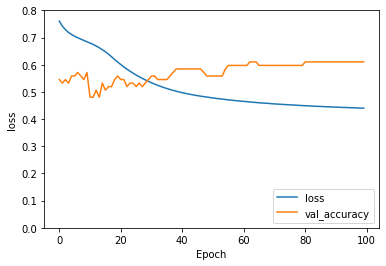

In [ ]:
plt.plot(model_1.history['loss'], label='loss')
plt.plot(model_1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.8])
plt.legend(loc='lower right')